<a href="https://colab.research.google.com/github/kssmp/Unsupervised_learning/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

Charytanowicz,Magorzata, Niewczas,Jerzy, Kulczycki,Piotr, Kowalski,Piotr, and Lukasik,Szymon. (2012). seeds. UCI Machine Learning Repository. https://doi.org/10.24432/C5H30K.


In [ ]:
cols = ["area" , "perimeter" , "compactness" , "lenght" , "width" , "asymmetry" , "groove" , "class"]
df = pd.read_csv("seeds_dataset.txt",names=cols, sep ="\s+")
df.head()

area  perimeter  compactness  lenght  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1

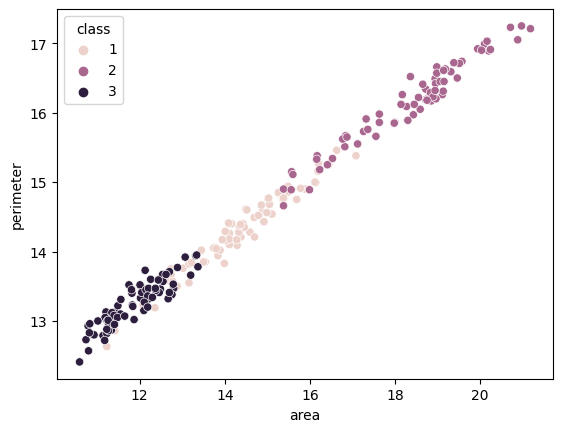

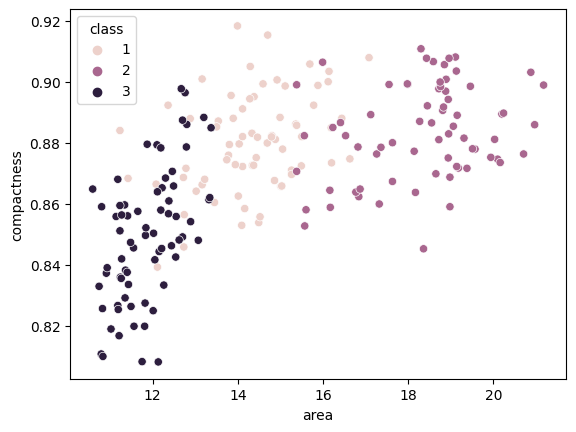

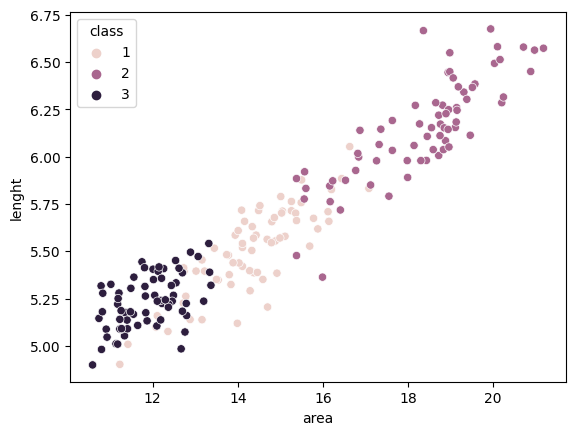

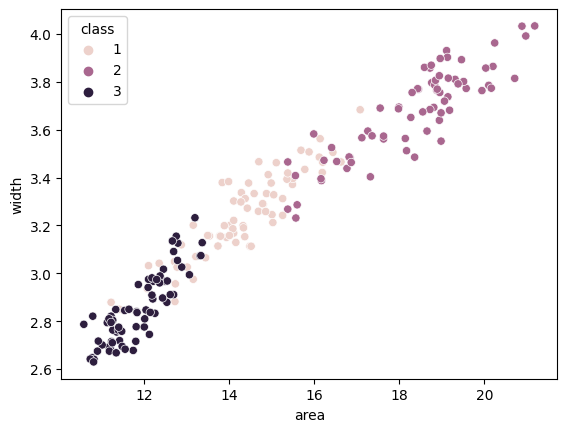

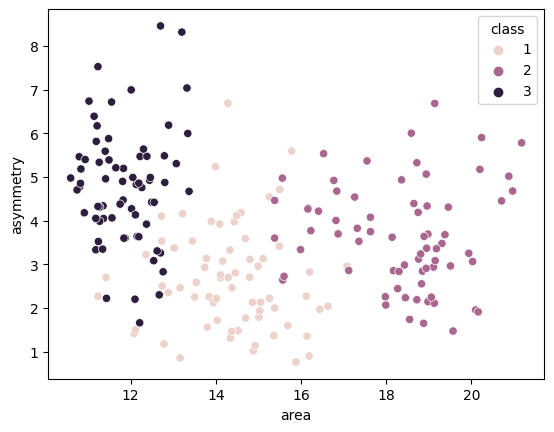

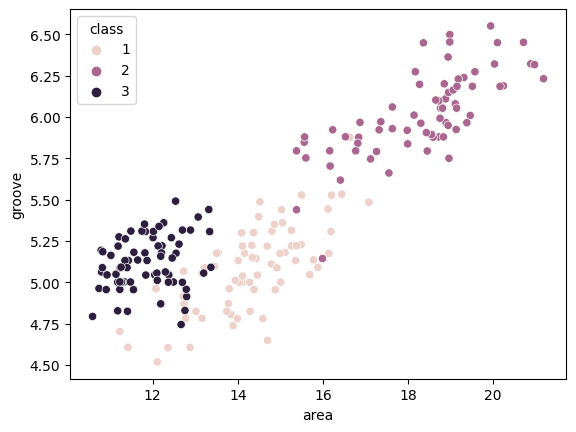

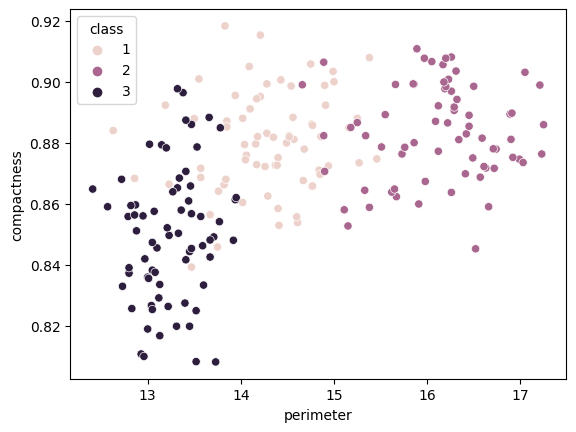

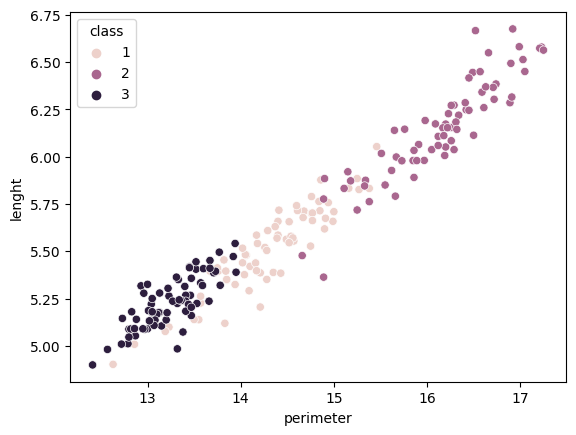

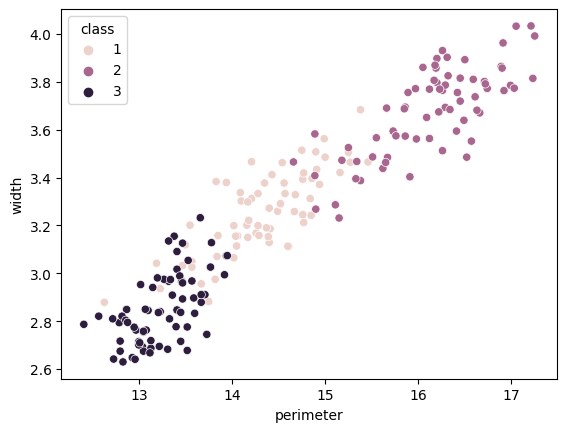

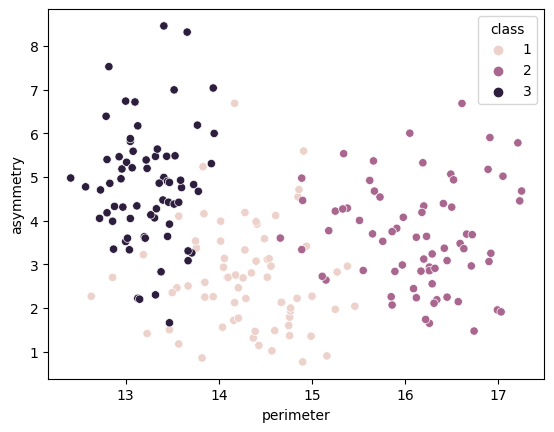

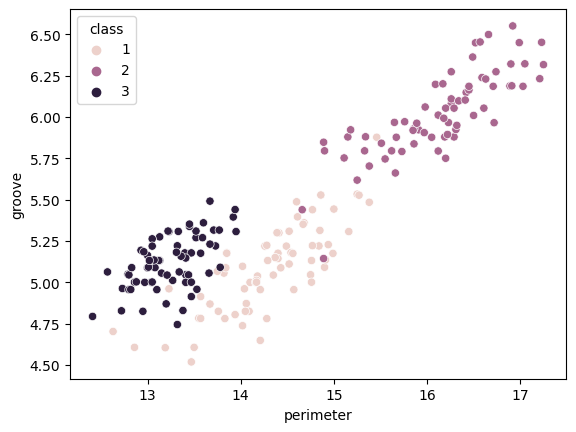

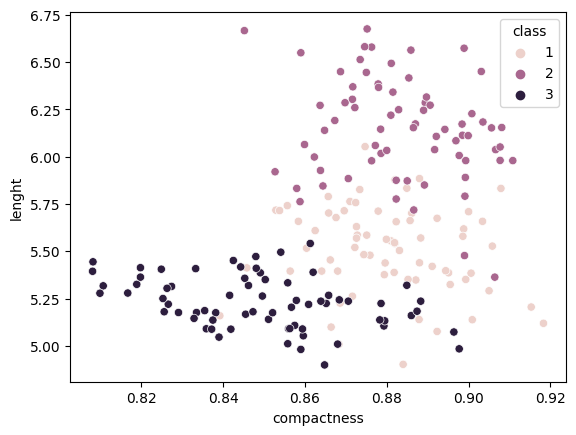

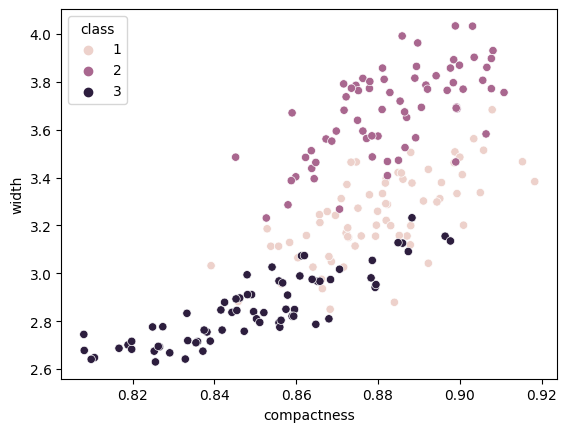

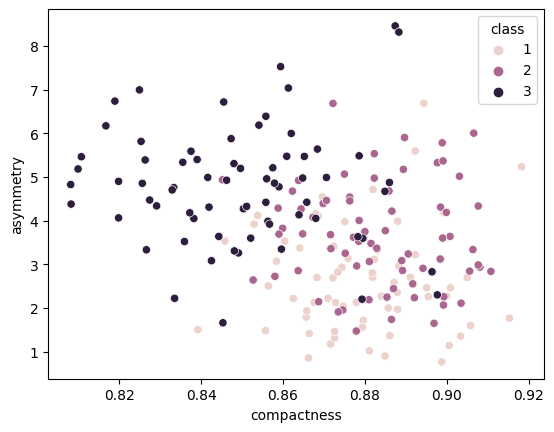

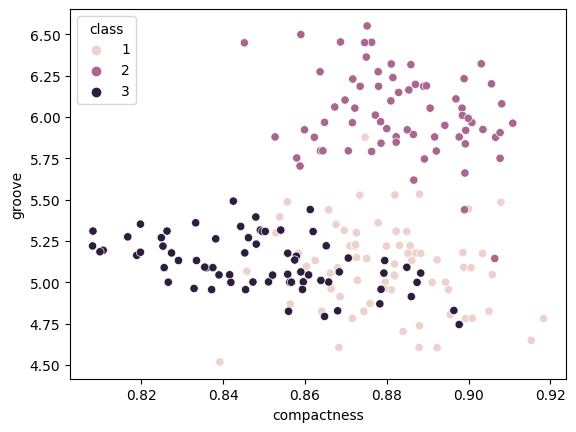

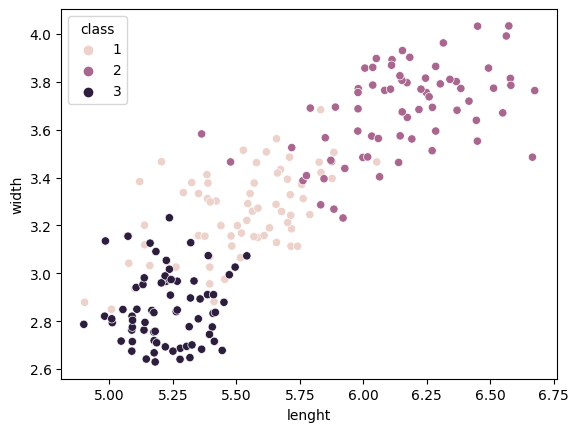

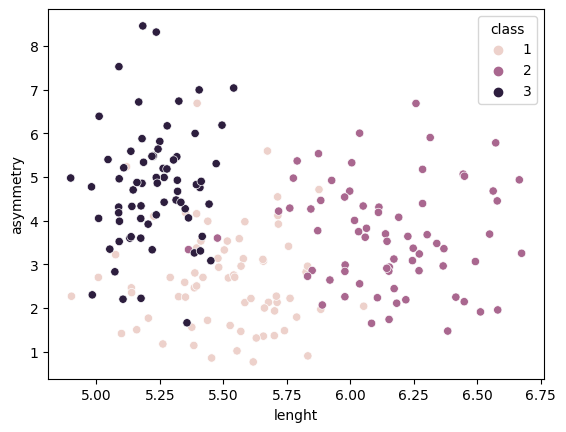

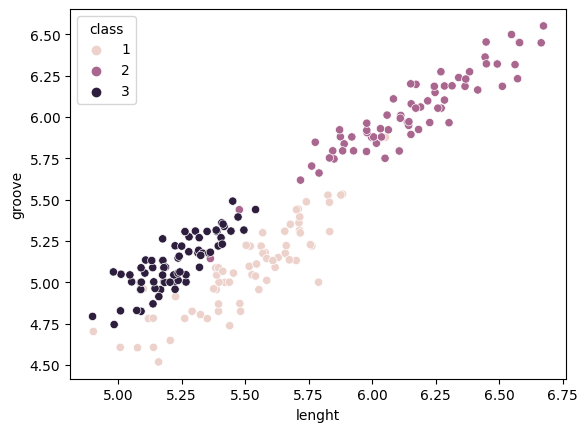

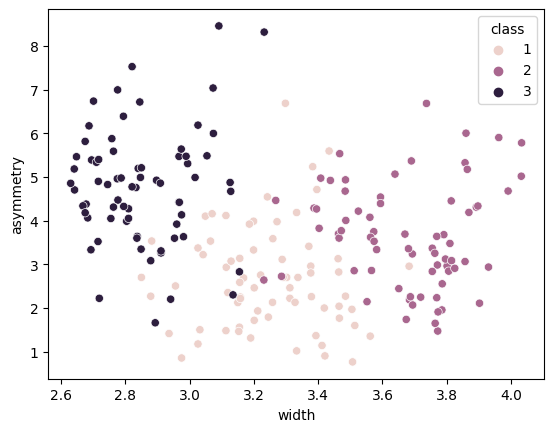

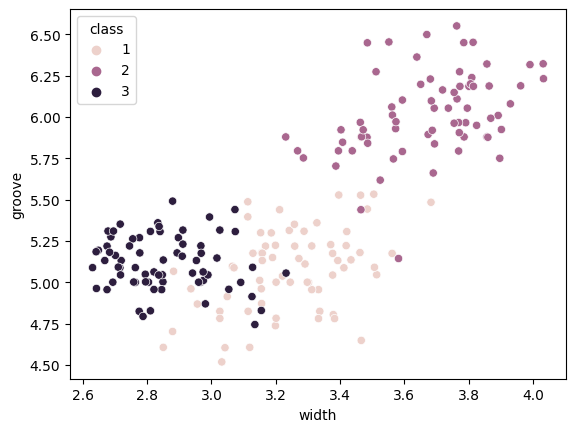

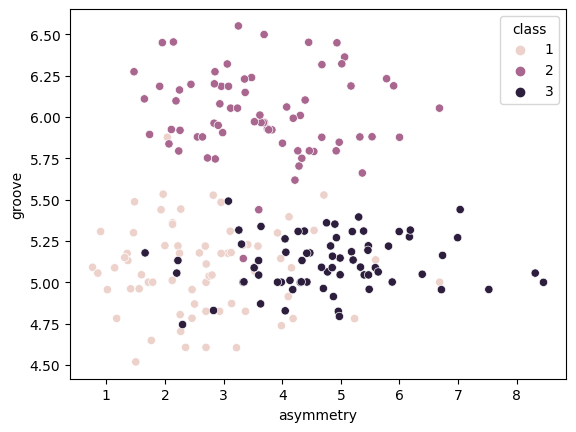

In [ ]:
for i in range(len(cols)-1):
  for j in range (i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x = x_label , y=y_label, data=df , hue='class')
    plt.show()

# K means clustering
computing k clusters from data

*   Choose k random points to be centroids
*   Calculate distances of data from centroids and make clusters using closest centroid (Expectation)
*   Compute new centroids and redo step 2 (Maximization)
*   Return Stable clusters

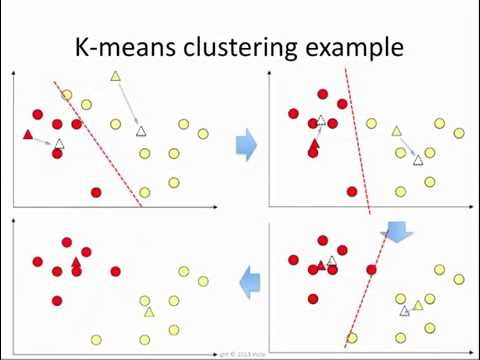





In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# using compactness vs asymmetry plot
x = "compactness"
y = "asymmetry"
X = df[[x,y]].values

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = kmeans.labels_
clusters # prediction of our model

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int32)

In [ ]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns = [x,y,"class"])
cluster_df.head()

compactness  asymmetry  class
0       0.8710      2.221    2.0
1       0.8811      1.018    2.0
2       0.9050      2.699    2.0
3       0.8955      2.259    2.0
4       0.9034      1.355    2.0

[]

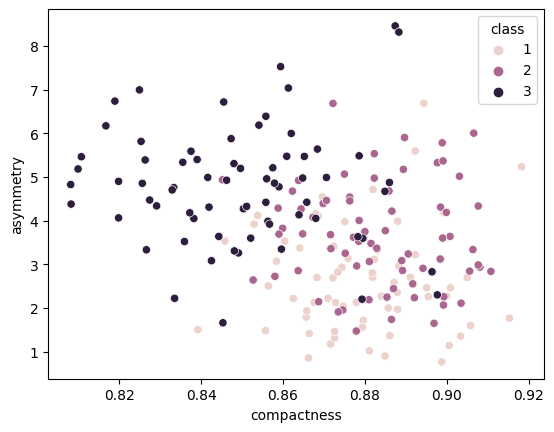

In [ ]:
#Original plot without modelling
sns.scatterplot(x=x , y=y , hue="class",data=df)
plt.plot()

[]

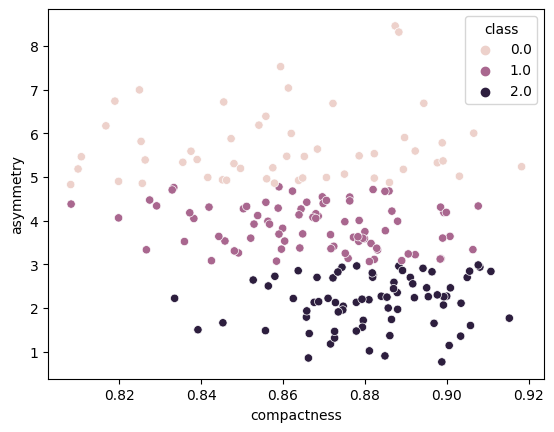

In [ ]:
sns.scatterplot(x=x , y=y , hue="class",data=cluster_df)
plt.plot()

# Higher Dimensions

In [ ]:
X = df[cols[:-1]].values

[]

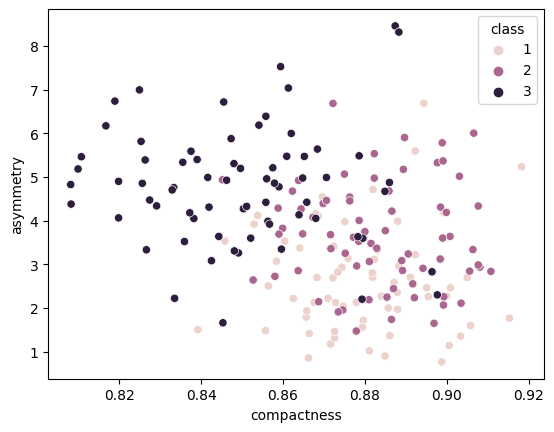

In [ ]:
#Original plot without modelling
sns.scatterplot(x=x , y=y , hue="class",data=df)
plt.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

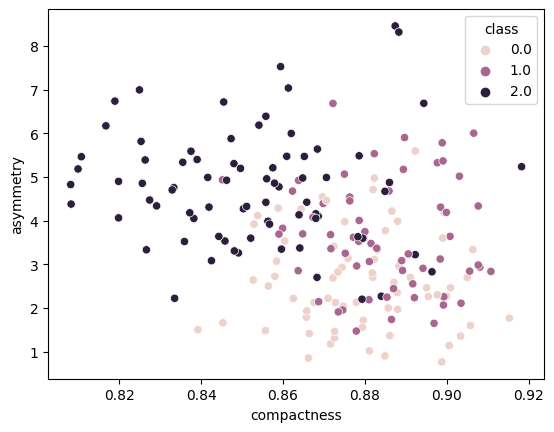

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_n = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, cluster_n.reshape(-1, 1))), columns=df.columns)
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

# Pricipal Component Analysis (PCA)

* Dimentionality reduction (reduce multiple features)
* Component (direction in space) with largest variance

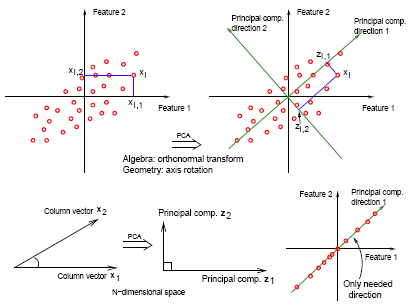

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
X = df[cols[:-1]].values
transformed_x = pca.fit_transform(X)

In [ ]:
X.shape

(210, 7)

In [ ]:
transformed_x.shape # each sample has now been converted into a two dimentional point from a 7 dimentional feature set

(210, 2)

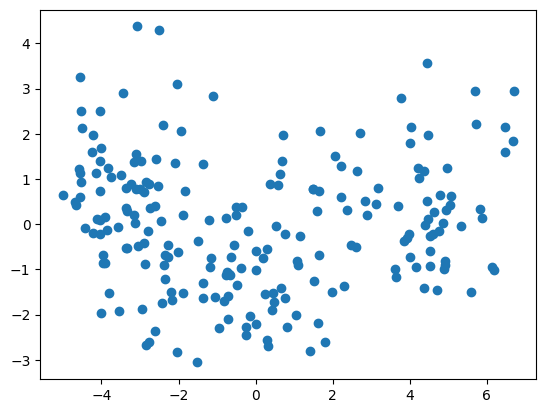

In [ ]:
plt.scatter(transformed_x[:,0],transformed_x[:,1]) # scatter plot of columns of transformed x

In [ ]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x,kmeans.labels_.reshape(-1,1))),columns = ["pca1" , "pca2" , "class"])
truth_pca_df = pd.DataFrame(np.hstack((transformed_x,df["class"].values.reshape(-1,1))),columns = ["pca1" , "pca2" , "class"])

[]

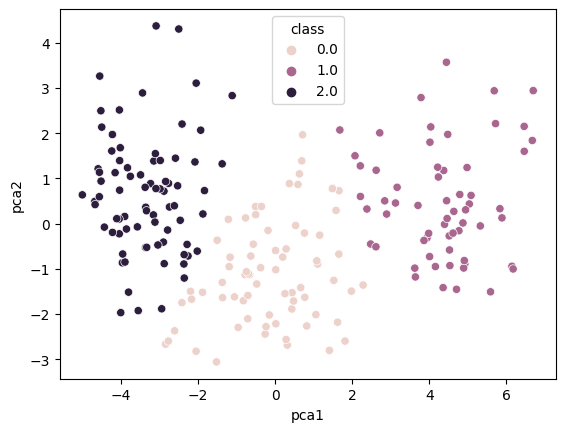

In [ ]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

[]

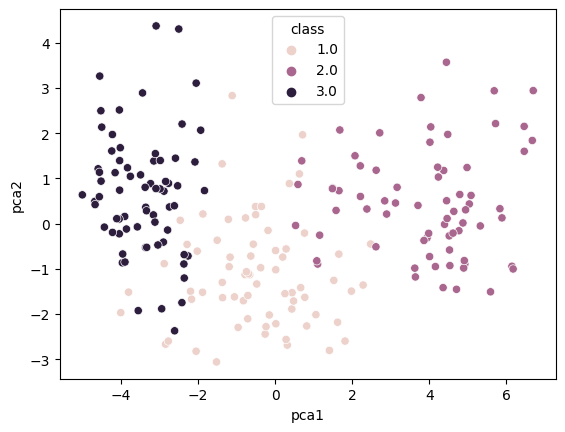

In [ ]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()